# INFO
- experiment: growing gooey
- stimulation: rsvp 100ms(stim) / 75ms(blank) / 2500ms break between tokens / 15 flashes per char / 6 tokens max per shape for a max time of 18 seconds.

- users tested: 1
- devices tested : 
    - OpenBCI: freq 125Hz / channels FC3,FCz,FC4,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2,Oz
- metric used : ...


This code demonstrates How to apply dimensionality reduction to generated objects of the same category, with or without several classes, with T-SNE and UMAP for comparison. Parameters may be adjusted to show more general or more local data structures.

# DEPENDENCIES

In [1]:
# BUILT-IN
import os
import math
import datetime
import json

# ML
from sklearn.preprocessing import normalize
import umap
from sklearn.manifold import TSNE

# DATAFRAMES
import numpy as np
import pandas as pd

# PLOTTING
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# SETTINGS

In [8]:
the_folder_path = "../data/growing_gooey" # relative datasets path
the_user = "compmonks" # check available users in data folder or add new ones
the_device = "openbci_v207" # available devices
the_data_path = os.path.join(the_folder_path,the_device,the_user,"mapping")

#
sns.set_context('paper')
sns.set_style('darkgrid')
diverging_color_palette = "coolwarm"
categorical_color_palette = "Paired"
#
reduction_metric = 'euclidean'
min_dist = 1.
n_neighbors = 10
learning_rate = 200.
n_epochs = 1000
random_state=42
spread = 20.
n_components=2

# UTILS

In [20]:
def getDataFile(the_path):
    """..."""
    
    with open("{}".format(the_path),'r') as data_file:
        load_data = json.load(data_file)
        the_data = np.empty([len(load_data),len(load_data[0])])
        for i,elem in enumerate(load_data):
            the_data[i] = np.asarray(elem) 
    return the_data
   
#
def applyUMAP(the_data):
    """..."""
    
    map_coords = {}
    df = pd.DataFrame(data = the_data)
    # remove constant columns
    df = df.loc[:, (df != df.iloc[0]).any()]
    for _col in df:
        if df[_col].round(3).nunique() <= 2:
            df = df.drop([_col], axis=1)
    # apply UMAP
    reducer = umap.UMAP(random_state=random_state, n_epochs = n_epochs, learning_rate = learning_rate, n_neighbors = n_neighbors, min_dist = min_dist,spread = spread,n_components=n_components, metric = reduction_metric)
    reduced = reducer.fit_transform(df)
    # get 2d coords
    for i,coords in enumerate(reduced):
        map_coords["{}".format(i)] = reduced[i]
        
    return map_coords
#
def applyTSNE(the_data):
    """..."""
    
    map_coords = {}
    df = pd.DataFrame(data = the_data)
    # remove constant columns
    df = df.loc[:, (df != df.iloc[0]).any()]
    for _col in df:
        if df[_col].round(3).nunique() <= 2:
            df = df.drop([_col], axis=1)
    # apply TSNE
    reducer = TSNE(n_components=n_components,
                   early_exaggeration=min_dist,
                   perplexity=n_neighbors,
                   learning_rate=learning_rate,
                   n_iter=n_epochs,
                   metric=reduction_metric,
                   random_state=random_state)
    reduced = reducer.fit_transform(df)
    # get 2d coords
    for i,coords in enumerate(reduced):
        map_coords["{}".format(i)] = reduced[i]
        
    return map_coords
#
def plotMap(the_type,the_coords, prop_index,the_properties,save_plot=False):
    """..."""
    
    palette = sns.color_palette(categorical_color_palette, len(prop_index))
    _map = np.empty([len(the_coords), 3])
    for i,_part in enumerate(the_coords):
        #print("prop_index:{}".format(np.where(prop_index)))
        #print("the_properties[_part]:{}".format(the_properties[i]))
        _map[i] = [the_coords[_part][0],the_coords[_part][1],int(np.where(prop_index==the_properties[i])[0])]

    plt.figure(figsize=[10,4])
    the_file_name = "{}-{}.png".format(the_type,datetime.datetime.now())
    sc = sns.scatterplot(x=_map[:,0], 
                    y=_map[:,1], 
                    hue=_map[:,2].astype(int), 
                    #label = [label.split("[")[-1].split("]")[0] for label in self.prop_index],
                    palette = palette
                    )
    sc.set_xticklabels([])
    sc.set_yticklabels([])
    plt.title(the_type)
    if save_plot:
        plt.savefig(os.path.join(the_data_path,"UMAP.png"),dpi = 800,format = "png")
    plt.show()

# UMAP

folder:openbci_v207/compmonks/mattepink_same_continuous
found file: compmonks_3_OBJECT-DATA_2019-6-19_11-8-12-023000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_21-4-26-735000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_20-28-31-469000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_20-46-15-310000.json
found file: compmonks_3_OBJECT-DATA_2019-6-17_9-31-28-166000.json
found file: compmonks_3_OBJECT-DATA_2019-6-21_9-48-36-166000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_18-30-9-981000.json
found file: compmonks_3_OBJECT-DATA_2019-6-21_8-53-23-680000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_18-22-33-028000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_21-39-11-095000.json
found file: compmonks_3_OBJECT-DATA_2019-6-17_9-42-47-209000.json
found file: compmonks_5_OBJECT-DATA_2019-6-24_18-47-13-266000.json
found file: compmonks_3_OBJECT-DATA_2019-6-16_16-28-2-235000.json
found file: compmonks_3_OBJECT-DATA_2019-6-16_15-47-7-954000.json
found file: com

/Users/pierrecutellic/py35/lib/python3.5/site-packages/umap/umap_.py:1031: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/Users/pierrecutellic/py35/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


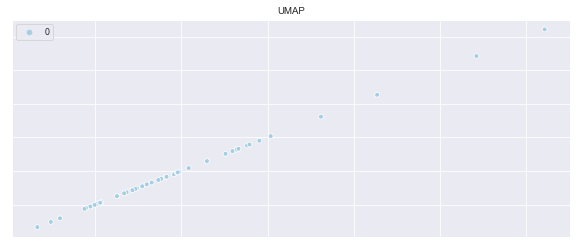

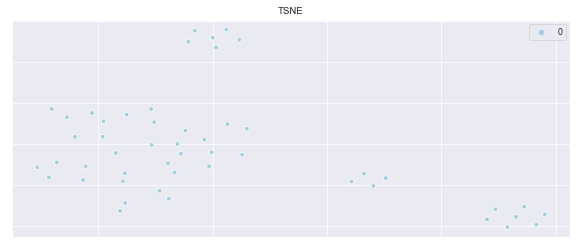

In [21]:
datafiles = []
properties = []

# get all files
for root, subdirs, files in os.walk(the_data_path):
    for dirs in subdirs:
        print("folder:{}/{}/{}".format(the_device,the_user,dirs))
        file_list = os.listdir(os.path.join(root,dirs))
        for _f in file_list:
            if ".json" in _f:
                print("found file: {}".format(_f))
                datafiles.append(os.path.join(root,dirs,_f))
                properties.append("{}".format(dirs))
prop_index = np.unique(properties)    
the_data = [getDataFile(filepath) for filepath in datafiles]

# get max amount of elements in a parts in one file
the_max_part = max(len(_p) for _p in the_data)
# get the length of params (ie params) in one element
the_part_len = len(the_data[0][0])

# equalize parts elements num with empty elements
the_filler = [0. for i in range(the_part_len)]
for i,_p in enumerate(the_data):
    if len(_p) < the_max_part:
        for j in range(the_max_part-len(_p)):
            the_data[i] = np.vstack((the_data[i],the_filler))
the_stacked_data = np.empty([len(the_data),the_max_part,the_part_len])
for i,_r in enumerate(the_stacked_data):
    the_stacked_data[i] = the_data[i]

# normalize data and concatenate part elements
the_stacked_data = normalize(the_stacked_data.reshape(the_stacked_data.shape[0],-1),norm="l2",axis=1).reshape(the_stacked_data.shape)
the_stacked_data = the_stacked_data.reshape(the_stacked_data.shape[0],-1)

# apply UMAP
mapped_U = applyUMAP(np.copy(the_stacked_data))
plotMap("UMAP",mapped_U, prop_index,properties,save_plot=False)

# try with TSNE
mapped_T = applyTSNE(np.copy(the_stacked_data))
plotMap("TSNE",mapped_T, prop_index,properties,save_plot=False)
